In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.columns=['CustomerID',"Gender","Age","Annual Income","Spending Score"]

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income,Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.drop(columns=["CustomerID",'Gender'], axis=1,inplace=True)
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


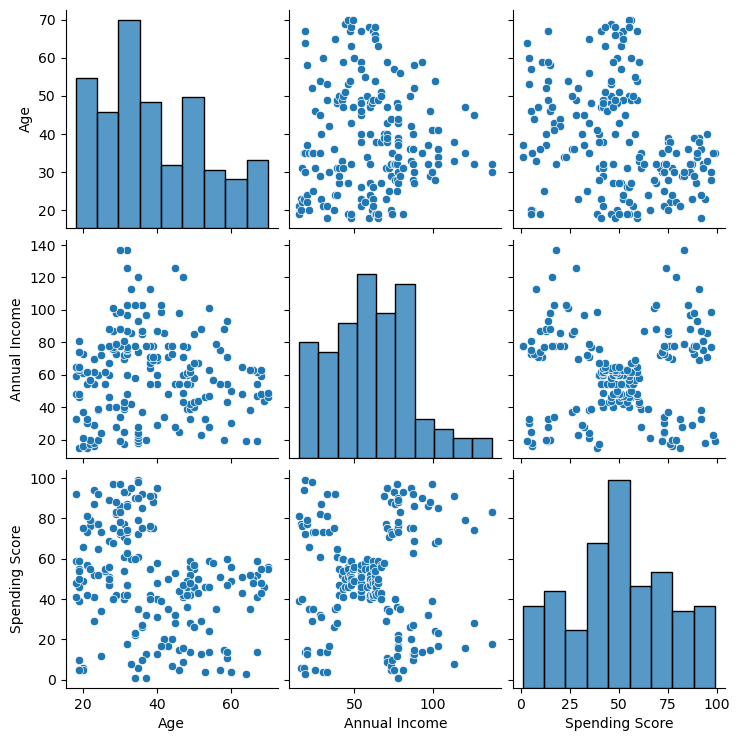

In [7]:
sns.pairplot(df)

Text(0.5, 1.0, 'Correlation Matrix')

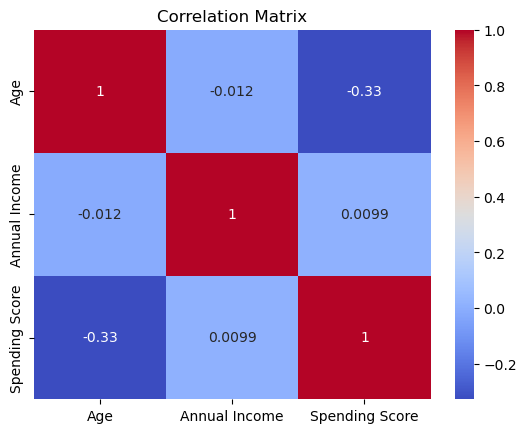

In [9]:
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title("Correlation Matrix")

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

data=scaler.fit_transform(df)

In [32]:
data
new_data={'Age':data[:,0],
          'AnnualIncome':data[:,1],
          'Spending Score':data[:,2]}
df1=pd.DataFrame(new_data)
df1.head()



,Age,AnnualIncome,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


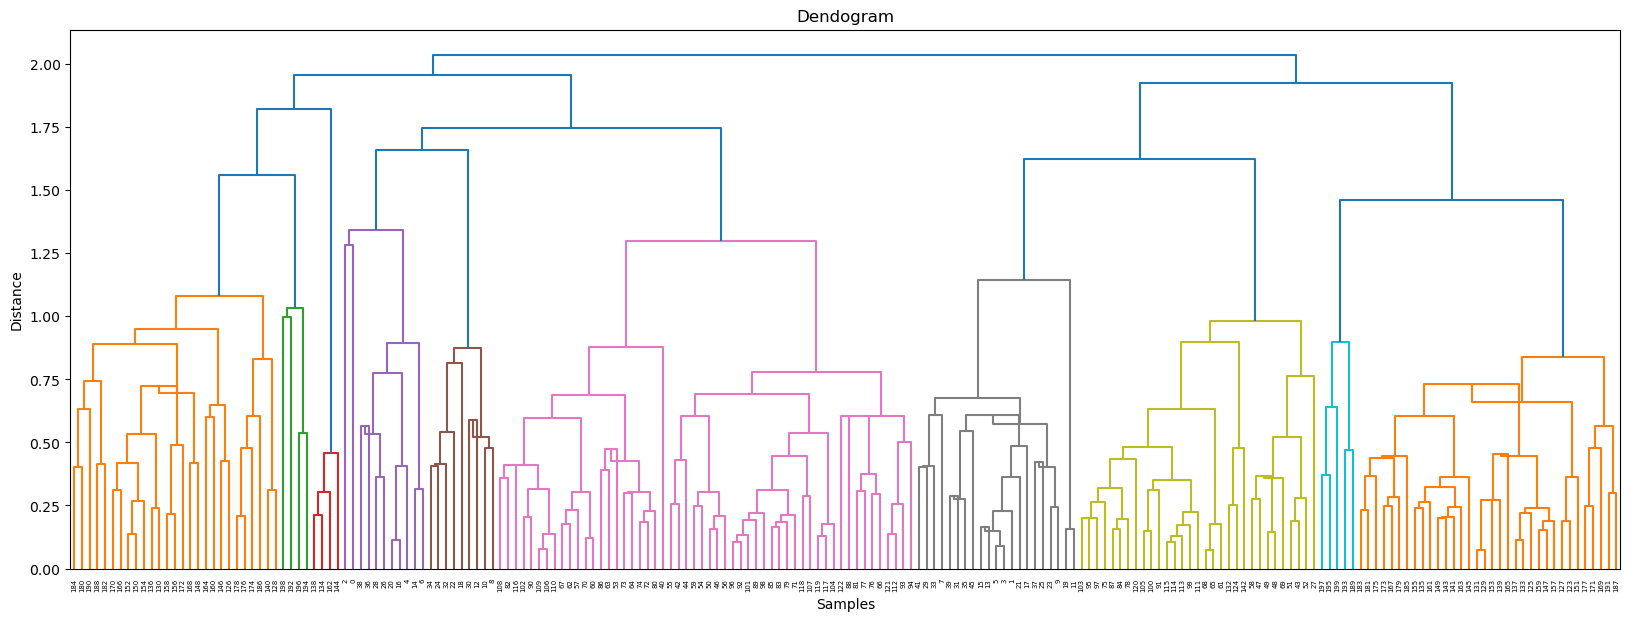

In [20]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(data,method='centroid')

plt.figure(figsize=(20,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title("Dendogram")
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

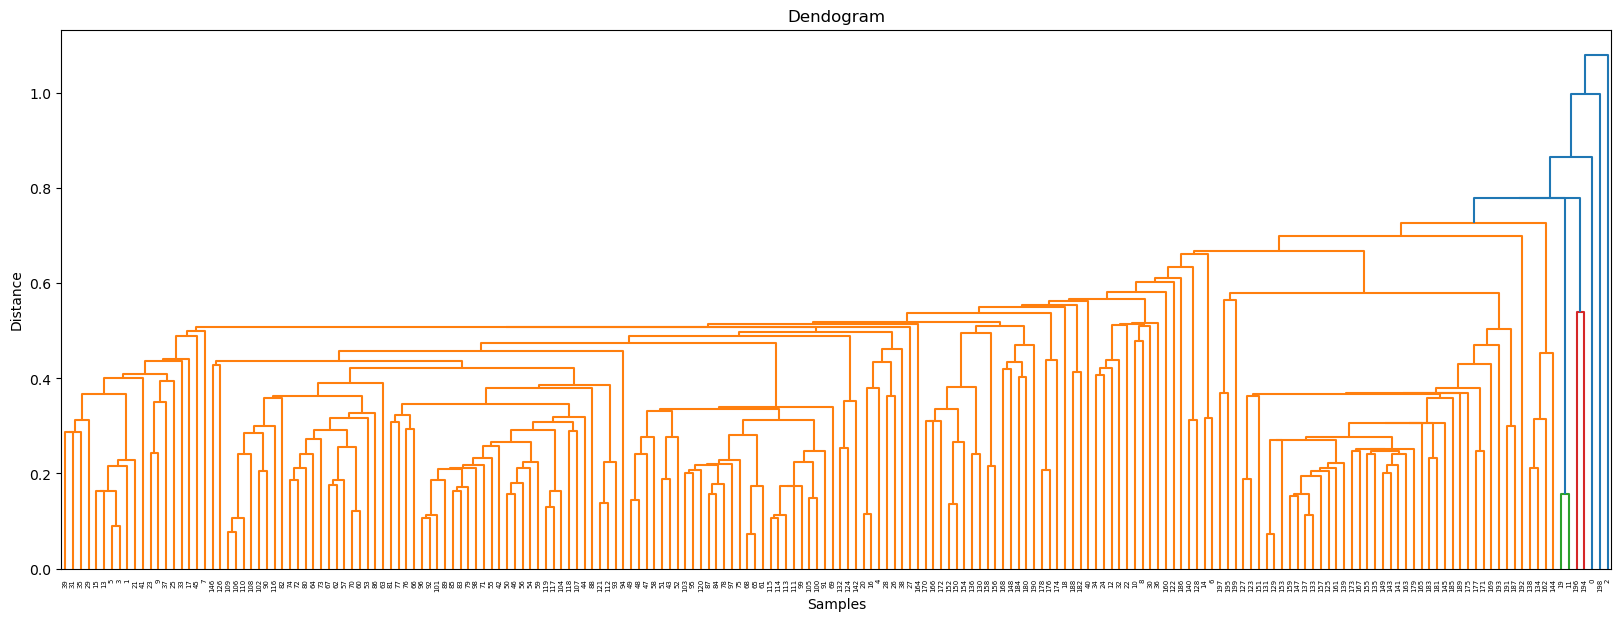

In [21]:
linked=linkage(data,method='single')

plt.figure(figsize=(20,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title("Dendogram")
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

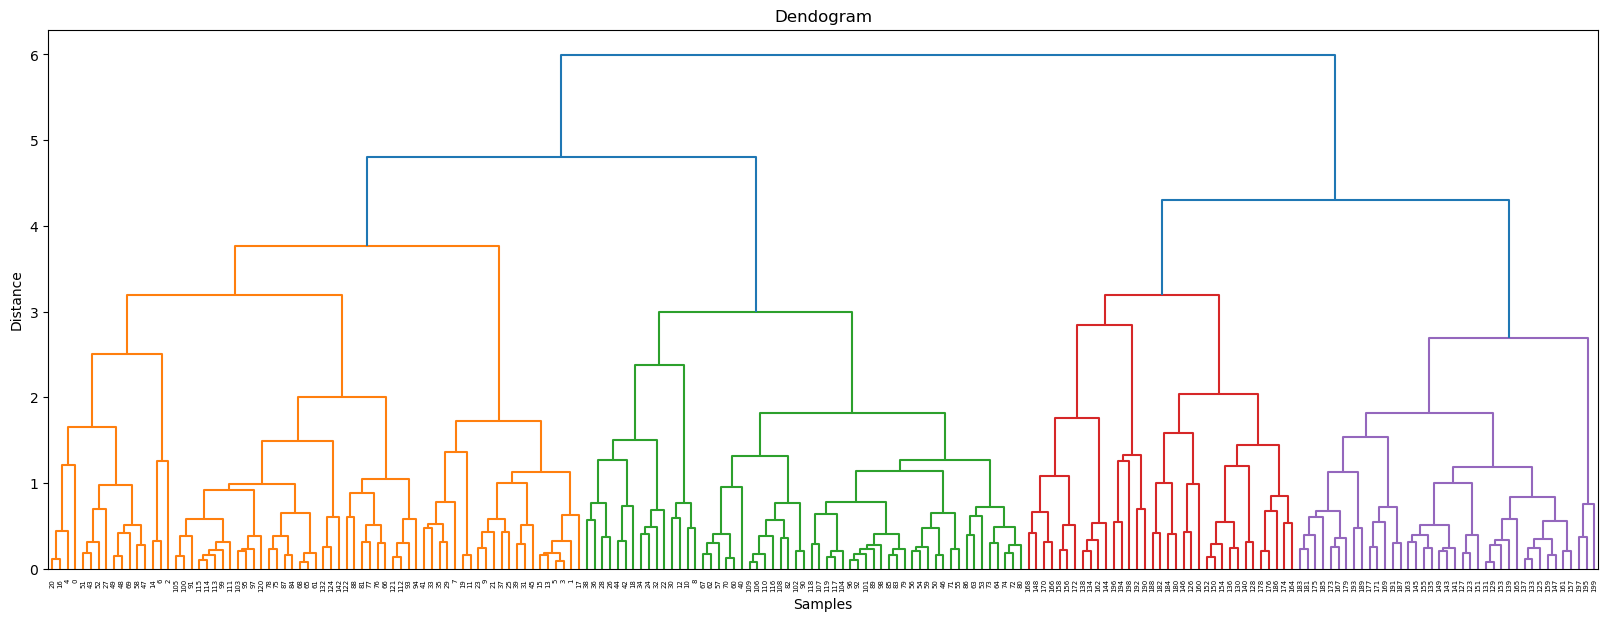

In [22]:
linked=linkage(data,method='complete')

plt.figure(figsize=(20,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title("Dendogram")
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

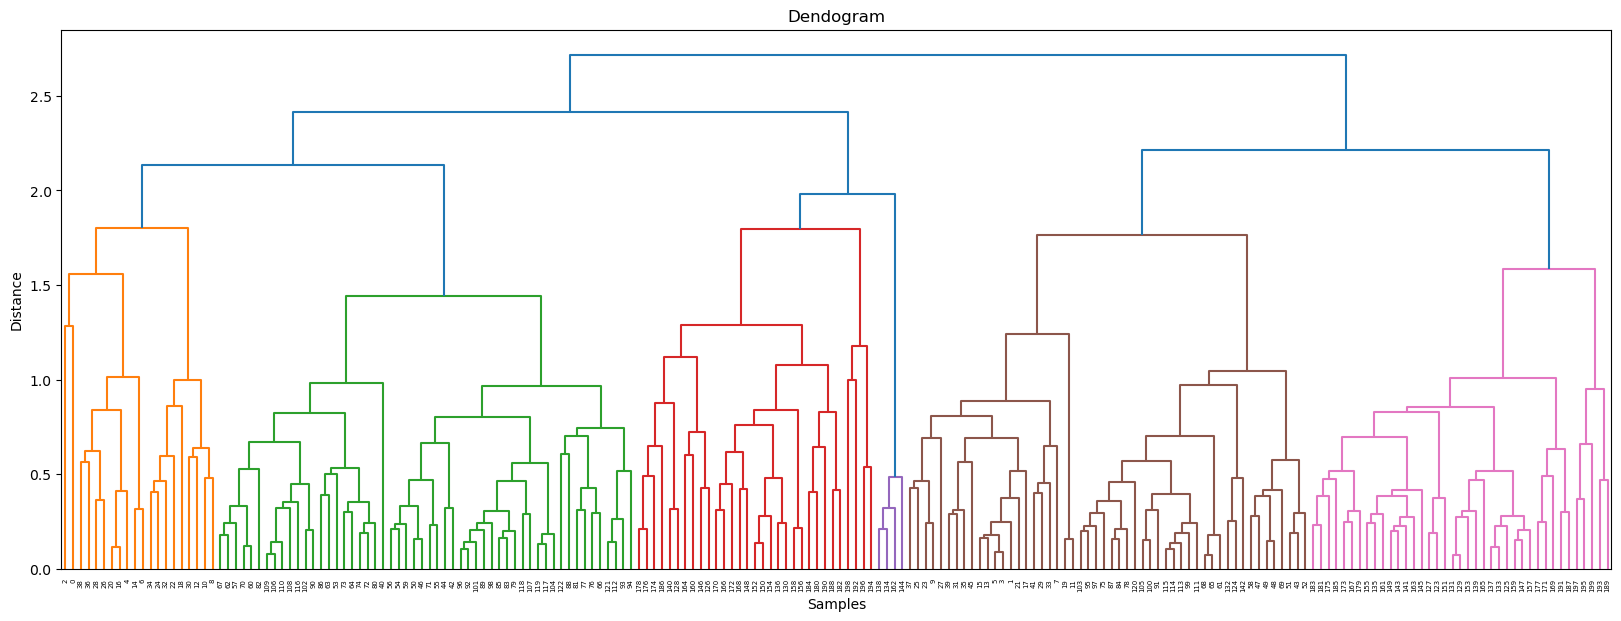

In [23]:
linked=linkage(data,method='average')

plt.figure(figsize=(20,7))
dendrogram(linked,orientation='top',distance_sort='descending',show_leaf_counts=True)
plt.title("Dendogram")
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [34]:
#train main
model=AgglomerativeClustering(n_clusters=5)
model.fit(data)
labels=model.labels_
df1['Cluester']=labels
df1.head()

,Age,AnnualIncome,Spending Score,Cluester
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,4


In [45]:
import pickle
with open('agm_model.pkl','wb') as file:
    pickle.dump(model,file)

Text(0.5, 1.0, 'Hierarchical Clustering')

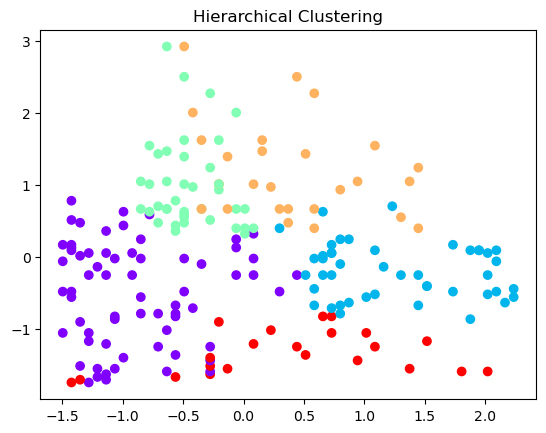

In [28]:
plt.scatter(data[:,0],data[:,1],c=labels,cmap='rainbow')
plt.title('Hierarchical Clustering')

In [35]:
df1.to_csv("clustered_mall_customers_hc.csv",index=False)

In [38]:
new_data1=pd.read_csv("clustered_mall_customers_hc.csv")
new_data1.head()

,Age,AnnualIncome,Spending Score,Cluester
0,-1.424569,-1.738999,-0.434801,4
1,-1.281035,-1.738999,1.195704,0
2,-1.352802,-1.700830,-1.715913,4
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,4


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

y=new_data1["Cluester"]
x=new_data1.drop("Cluester",axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print("Accuracy_Score :",accuracy_score(y_test,y_pred))

Accuracy_Score : 0.95


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier( criterion='entropy',max_depth=20)
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)
print("Accuracy_Score :",accuracy_score(y_test,y_pred1))

Accuracy_Score : 0.925


In [47]:
import pickle
with open('dt_model.pkl','wb') as file:
    pickle.dump(dt,file)